# Metadata:
- Title Final Project Report
- Class DS 5100
- Date: 07/14/2022
- Student Name: Kyler Halat-Shafer
- Student ID: uxt5qb
- This URL: 
- Git Hub Repo URL: https://github.com/kylerhalat-shafer/Final_Project

## Monte Carlo Module:

In [1]:
import pandas as pd
import numpy as np
import math
import os
import random

class Die:
    
    '''
    The Die Class: is creating a 'die' meaning any probability object, whether it is for a coin flip or rolling a six-sided die.
    Params: It will have faces, weights for each of those faces, be able to activate or 'roll' the 'die' 
    Return: A dataframe with the faces and weights 
    '''
    
    def __init__(self, faces):
        ''' 
        description: Here we are initializing the Die class 
        param: 1.) Faces, which is an array to create any die object. 2.) Weights are just a number e.g. 5 versus 1, rather than a normalized probability distribution 
        type: 1.) Faces are strings or numbers 2.) Weights are integers or floats
        return: The faces and the weights, originally set to a value of 1, will then be cataloged in a dataframe
        '''
        self.faces = faces #defining faces and so it can be called inside the class
        self.weights = np.ones(len(faces)) #defining the weights as an array of 1 to match the length of faces
        self.__df = pd.DataFrame({'faces': self.faces, 'weights':self.weights}) # dataframe with both faces and weights included, private
        
    def change_the_weight(self,new_face, new_weight):
        ''' 
        description: This gives the user the ability to change the weight by first giving the argument of the face
        param: 1.) New_face, for example we have a six sided die, the user will pick the side '4' and be able to adjust the weight as 2.) new_weight
        type: 1.) New_face are strings or numbers 2.) New_weight are integers or floats
        return: changing the dataframe from above to incorporate the new weight given
        '''
        if new_face not in list(self.__df['faces']): # testing to see if the new_face is in the dataframe initialized
            print('Value did not pass')
        else:
            if (type(new_weight)) not in [int,float]:# testing to see if the new_weight 
                print('Change to integer or float to continue')
            else:
                self.__df.loc[self.__df.faces == new_face, 'weights'] = new_weight #if both tests are passed then changing the dataframe to include the new_weight
        
    def roll(self, num_rolls = 1): #this is taking the argument of the number of rolls, defaulting to 1
        ''' 
        description: This is a random sample from the faces according to weights i.e. the rolling of a die 
        param: the number of rolls, initially set to 1
        type: integer or float
        return: the list of results, which is the faces after rolling the die a specified number of times
        '''
        results = [] 
        #my_probs = [i/sum(self.weights) for i in self.weights] 
        for i in range(num_rolls): 
            result = self.__df.faces.sample(weights = self.__df['weights']).values[0] 
            results.append(result)
        return results # where i is a single roll, the result is the face, and appending that result to the list
    
    def show(self):
        ''' 
        description: showing the current faces and weights as a dataframe
        '''
        print('The current state faces and weights:') 
        return self.__df

class DieGame:
    
    '''
    The DieGame Class: a game consists of rolling one or more 'die' 
    Params: Inputting each die, that have faces and weights already defined 
    Return: A dataframe of the number of die, the rolls, and the faces
    '''
    
    def __init__(self,dice): #input the dice that have been created using the first class, Die
        ''' 
        description: Each game is initialized by having one or more similarly defined dice e.g. d and d2 were created and can be used in this game
        param: each die has the same amount of faces, but the weights can differ
        type: the faces are either string or numeric,but not intermixed
        '''
        self.dice = dice #this will allow the dice to be called on
        
    def play2(self,n_rolls = 1):
        ''' 
        description: This method will roll the dice the specified number of times the user inputs
        param: N_rolls is the number of rolls that should occur
        type: integer
        return: a dataframe that the rows are the roll number, the columns are the die, and the face rolled as the element 
        '''
        self.__roll_results = pd.DataFrame(index=range(1,n_rolls + 1)) #setting the row to offset and start with 1
        self.__roll_results.index.rename('Roll_Number' ,inplace = True) # renaming the row to be 'Roll_Number'
        n = 0
        for die in self.dice: #for each die in dice
            roll = die.roll(n_rolls) #iterating over the multiple dies in dice, for the amount of rolls 
            self.__roll_results[n] = roll #starting as a blank dataframe then adding the roll 
            n = n + 1 #need to define a column with each new die, since there can be more than 1
            
    
    def display(self, wide = True):
        ''' 
        description: Producing a wide dataframe by default and creating the option for a narrow dataframe to be given
        param: True as the input for a wide dataframe and False for a narrow dataframe
        return: Either a wide or narrow data frame of the roll number, dies, and faces rolled
        '''
        d1 = self.__roll_results.copy() #needed to make a copy, originally by altering the actual dataframe infringed on code written later
        d1['id'] = d1.index
        narrowdf = pd.melt(d1, id_vars = ["id"]) #using the copied dataframe to make the adjustment to narrow, which needs an id parameter
        narrowdf.columns = ['Roll_Number','Die','Face_Value'] #name the columns
        narrowdf.set_index(['Roll_Number','Die'],inplace = True) #allowing Roll Number and Die to be stacked
        
        if wide == True:
            return self.__roll_results
        if wide == False:
            return narrowdf
        else:
            return 'Please enter True to return a wide dataframe and False for a narrow dataframe.'

class Analyzer: 
    
    '''
    The Analyzer Class: Giving outputs to help understand what happened in a given game
    Params: A game that has one or more die in it 
    Returns: Different views of when all faces are equal, the unique instances, and overall face counts 
    '''
    
    def __init__(self,game): 
        ''' 
        description: Takesthe results of a single game and analyzes that game
        param: the game that was ran off of the previous class 
        return: displays the type in the game 
        '''
        self.game = game
        game.display().dtypes
    
    def jackpot(self):
        ''' 
        description: How many times a roll, with one or multiple dies, resulted in all faces being the same 
        param: inputting a game through this method
        type:Intger
        return: a dataframe of just the roll numbers that have all faces equal
        '''
        ww = [] #creating an empty list to append to 
        for r in range(len(self.game.display())): #game.display() is the dataframe from the class DieGame, we want the length of that to iterate through 
            if len(set(list(self.game.display().loc[r+1,:]))) == 1: #then looking at each row,using loc, by creating this into a set, if all faces are the same it will output an integer
                ww.append(True) 
            else:
                ww.append(False) # we want both True and False results in this list 
        self.jack = self.game.display()[ww] # we can then take that list against the new dataframe for jackpot that is created to display the roll number and faces
        return len(self.jack)
    
    def combo(self):
        ''' 
        description: How many combination types of faces were rolled 
        param: inputting a game through this method
        type:
        return:
        '''
        self.comb = pd.DataFrame(self.game.display().groupby(list(self.game.display().columns)).size()) #creating a dataframe based on the data frame from the DieGame class, grouping by the columns
        # transforming those columns into a list, and takes the number of rows using size 
        self.comb.columns = ['Number of Instances'] #naming the columns
        return self.comb.sort_values(by=['Number of Instances']) 
    
    def face_counts(self):
        ''' 
        description: the number of times a given face appeared in each roll 
        return: a cross tab of faces by roll 
        '''
        self.gamecross = pd.crosstab(index = list(self.game.display(False).reset_index()['Roll_Number']), columns = list(self.game.display(False)['Face_Value']))
        #the row is the narrow df, after reseting the index so that only Roll Number can be used, the columns are the Face Values in the narrow dataframe, which needs to be a list in a df
        return self.gamecross

## Test Module:

In [ ]:
import unittest
import pandas as pd
import numpy as np
from montecarlo1 import Die
from montecarlo1 import DieGame
from montecarlo1 import Analyzer

class DieGameTestSuite(unittest.TestCase):
    '''
    This testing file is designed to test each method in that is in each class of the module montecarlo. It imports the classses Die,DieGame, and Analyzer then specifically looks at each method in
    them, as they appear in the montecarlo.py file. 
    '''

    def test_change_the_weight(self): 
        '''
        description: This test is seeing if the face that is passed is in the array of weights. 
        return: By changing the weight of the face 5 to the weight of 6, then applying a boolean check to see if the new face's weight is equal to 6 provides a True respone
        note: Originally used a self.assertEqual method, however, this errored as pandas does not appreciate the boolean nature of testing dataframes or series 
        '''
        testing = Die([1,2,3,4,5,6])
        testing.change_the_weight(5,6) 
        new_face =  5
        df = testing.show()  
        df.loc[df.faces == new_face, 'weights'] == 6
    
    def test_roll(self): 
        '''
        description: Does the method take in how many times the die is to be rolled? Does this return a list of outcomes?
        return: By inputting a normal die, rolling it 10 times and then checking the length of roll using assertEqual as boolean response and seeing if it is a list is in the instance the 
        two questions are resolved
        note: Using k and l throughout as naming longer variables that are used in order to save computing time, reduce amount of code written, and getting in the habit of reduce, reuse, recycle
        '''
        testing = Die([1,2,3,4,5,6])
        k = testing.roll(10) 
        self.assertEqual(len(k),10) 
        self.assertIsInstance(k, list) 
     
    def test_show(self):
        '''
        description: Does this show the current set of faces and weights?
        return: By understanding that there are two columns, one for the roll number and the die(s) the length of a set will be 2 for columns, same as for the number of columns
        note: The set function here can be eliminated since all characters are unique
        '''
        testing = Die([1,2,3,4,5,6])
        df = testing.show() 
        self.assertEqual(len(set(list(df.columns))),2)
        self.assertEqual(len(set(list(df.index))), 6) 
  
    def test_play2(self): 
        '''
        description: Does it create a table where the columns are roll number, the die number is the row, and the element is the face?
        return: By playing a simple game of 10 rolls, the number of rows will be equal to the number of rolls, whereas the columns will be equal to 1 in display since the die is the only column
        in the way that this dataframe is designed
        '''
        testing = Die([1,2,3,4,5,6]) 
        game_test = DieGame([testing]) 
        game_test.play2(10) 
        self.assertEqual(len(list(game_test.display().index)), 10)
        self.assertEqual(len(game_test.display().columns), 1)
                   
    def test_display(self): 
        '''
        description: Is a narrow and a wide dataframe able to be created? Expected number of rows, columns, and indexes are also checked. 
        return: Boolean responses are returned for both the narrow and wide dataframes as well as the length of rows and columns. The difference in narrow and wide is having double the amount of
        rows in this example, which checking for and seeing is correct shows that both are created. As well as columns are different. 
        note: Originally used a self.assertEqual method, however, this errored as pandas does not appreciate the boolean nature of testing dataframes or series
        '''
        testing = Die([1,2,3,4,5,6])
        game_test = DieGame([testing, testing])
        game_test.play2(10)
        k = game_test.display(True) 
        l = game_test.display(False) 
        k == True
        l == True
        self.assertEqual(len(k.index),10) 
        self.assertEqual(len(k.columns),2) 
        self.assertEqual(len(l.index),20) 
        self.assertEqual(len(l.columns),1) 
        
    def test_jackpot(self): 
        '''
        description: Check the dataframe that is created if all face_values are identical.
        return: By doing a simple test with a die where it has only one face and one roll, then the jackpot would have to be triggered and be equal to one, shown below. 
        '''
        testing = Die([6])
        game_test = DieGame([testing])
        game_test.play2(1)
        test_jack = Analyzer(game_test) 
        self.assertEqual(test_jack.jackpot(),1) 
    
    def test_combo(self): 
        '''
        description: Check the dataframe that is created if all paired face_values are unique. 
        return: The idea here is to use the method as is, then to test it by reseting the index to get a length that is measurable against the number of rows. Without reseting the index 
        then checking the rows became increasing challenging. 
        '''
        testing = Die([1,2,3,4,5,6])
        game_test = DieGame([testing,testing])
        game_test.play2(10)
        test_combo = Analyzer(game_test)
        k = test_combo.combo()
        len(k.reset_index(drop=True))==10
                        
    def test_face_count(self):
        '''
        description: Check the dataframe that your face_count is saved. 
        return: By using a simple 1 faced die, the game can be played and saved to the dataframe and boolean tested to see if the dataframe has been saved. From there the rows should be equal 
        to the number of rolls, and the columns equal to the single die where the face is saved. Since the die = face, then the face is saved. 
        '''
        testing = Die([5])
        game_test = DieGame([testing])
        game_test.play2(10)
        test_faceco = Analyzer(game_test)
        test_faceco.face_counts() 
        k = test_faceco.gamecross  
        k == True 
        self.assertEqual(len(k.index),10) 
        self.assertEqual(len(k.columns),1) 
        
if __name__ == '__main__':
    unittest.main(verbosity=3)


## Test Results:

In [ ]:
test_change_the_weight (__main__.DieGameTestSuite) ... ok
test_combo (__main__.DieGameTestSuite) ... ok
test_display (__main__.DieGameTestSuite) ... ok
test_face_count (__main__.DieGameTestSuite) ... ok
test_jackpot (__main__.DieGameTestSuite) ... ok
test_play2 (__main__.DieGameTestSuite) ... ok
test_roll (__main__.DieGameTestSuite) ... ok
test_show (__main__.DieGameTestSuite) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.068s

OK

## Scenarios:

### Scenario 1:
#### Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [12]:
#from montecarlo import Die
#from montecarlo import DieGame
#from montecarlo import Analyzer
#import pandas as pd
#import numpy as np
#import math
#import os
#import random

In [2]:
f1 = Die(['H','T'])

In [3]:
u1 = Die(['H','T'])

In [4]:
u1.change_the_weight('T',5)

In [5]:
u1.show()

The current state faces and weights:


,faces,weights
0,H,1.0
1,T,5.0


In [6]:
u2 = Die(['H','T'])

In [7]:
u2.change_the_weight('H',5)

In [8]:
u2.show()

The current state faces and weights:


,faces,weights
0,H,5.0
1,T,1.0


### Play a game of 1000 flips of three coins with all fair dice.

In [9]:
game1 = DieGame([f1,f1,f1])

In [10]:
game1.play2(1000)

In [11]:
game1.display(True)

,0,1,2
Roll_Number,,,
1,T,T,T
2,T,T,T
3,H,H,T
4,T,H,T
5,T,H,H
...,...,...,...
996,T,T,H
997,T,H,T
998,H,H,T


### Play a game of 1000 flips with two unfair dice and one fair die.

In [13]:
game2 = DieGame([f1,u1,u2])

In [14]:
game2.play2(1000)

In [15]:
game2.display(True)

,0,1,2
Roll_Number,,,
1,H,T,T
2,T,T,H
3,H,T,H
4,H,T,H
5,T,T,H
...,...,...,...
996,H,T,H
997,T,T,H
998,T,T,H


In [16]:
game2.display(False)

,,Face_Value
Roll_Number,Die,
1,0,H
2,0,T
3,0,H
4,0,H
5,0,T
...,...,...
996,2,H
997,2,H
998,2,H


### For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.

In [17]:
somethingin = Analyzer(game1)

In [18]:
somethingin.jackpot()

254

In [19]:
somethingin.jack

,0,1,2
Roll_Number,,,
1,T,T,T
2,T,T,T
13,H,H,H
18,T,T,T
20,H,H,H
...,...,...,...
976,T,T,T
979,H,H,H
985,T,T,T


In [20]:
eleanor = Analyzer(game2)

In [21]:
eleanor.jackpot()

138

In [22]:
print('Game 1 had a relative frequency of:') 
game1freq = 254/1000
game1freq

Game 1 had a relative frequency of:


0.254

In [23]:
print('Game 2 had a relative frequency of:') 
game2freq = 138/1000
game2freq

Game 2 had a relative frequency of:


0.138

### Show your results, comparing the two relative frequencies, in a simple bar chart.

In [24]:
import matplotlib.pyplot as plt

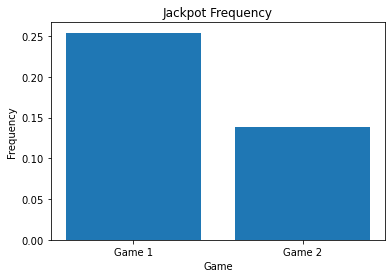

In [25]:
Game = ['Game 1', 'Game 2']
Frequency = [0.254,0.138]

plt.bar(Game,Frequency)
plt.title('Jackpot Frequency')
plt.xlabel('Game')
plt.ylabel('Frequency')
plt.show()

## A 6-sided die

Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. <br> 
- One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). 
- The other unfair die (Type 2) will  weight 1 five times more than the others.

In [26]:
fd1 = Die([1,2,3,4,5,6])
dt1 = Die([1,2,3,4,5,6])
dt2 = Die([1,2,3,4,5,6])

In [27]:
dt1.change_the_weight(6,5)

In [28]:
dt1.show()

The current state faces and weights:


,faces,weights
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


In [29]:
dt2.change_the_weight(1,5)

In [30]:
dt2.show()

The current state faces and weights:


,faces,weights
0,1,5.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


### Play a game of 10000 rolls with 5 fair dice.

In [31]:
game3 = DieGame([fd1,fd1,fd1,fd1,fd1])

In [32]:
game3.play2(10000)

In [33]:
game3.display()

,0,1,2,3,4
Roll_Number,,,,,
1,4,4,3,5,3
2,4,5,3,4,2
3,3,6,3,5,2
4,2,5,5,4,6
5,6,3,4,1,4
...,...,...,...,...,...
9996,1,2,2,5,1
9997,3,1,6,4,1
9998,4,5,4,5,1


### Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [34]:
game4 = DieGame([dt1,dt1,dt2,fd1,fd1])

In [35]:
game4.play2(10000)

In [36]:
game4.display()

,0,1,2,3,4
Roll_Number,,,,,
1,4,6,1,2,1
2,6,5,1,4,2
3,1,6,1,5,6
4,1,6,5,1,5
5,5,1,3,4,2
...,...,...,...,...,...
9996,6,3,3,5,4
9997,6,2,1,6,4
9998,1,2,1,3,3


### For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [37]:
norwegianw = Analyzer(game3)
yesterday = Analyzer(game4)

In [38]:
norwegianw.jackpot()

5

In [39]:
norwegianw.jack

,0,1,2,3,4
Roll_Number,,,,,
316,6,6,6,6,6
1048,3,3,3,3,3
4563,3,3,3,3,3
6707,5,5,5,5,5
7149,1,1,1,1,1


In [40]:
yesterday.jackpot()

6

In [41]:
yesterday.jack

,0,1,2,3,4
Roll_Number,,,,,
444,6,6,6,6,6
781,3,3,3,3,3
3967,6,6,6,6,6
5077,6,6,6,6,6
5846,6,6,6,6,6
7451,1,1,1,1,1


In [42]:
print('Game 3 had a relative frequency of:') 
game3freq = 5/10000
game3freq

Game 3 had a relative frequency of:


0.0005

In [43]:
print('Game 4 had a relative frequency of:') 
game4freq = 6/10000
game4freq

Game 4 had a relative frequency of:


0.0006

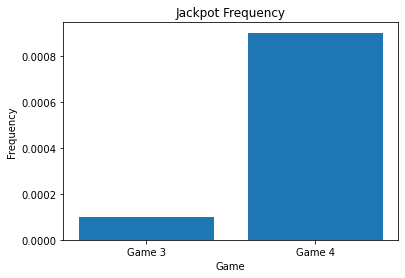

In [44]:
Game = ['Game 3', 'Game 4']
Frequency = [0.0001,0.0009]

plt.bar(Game,Frequency)
plt.title('Jackpot Frequency')
plt.xlabel('Game')
plt.ylabel('Frequency')
plt.show()

### Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

<AxesSubplot:xlabel='0,1,2,3,4'>

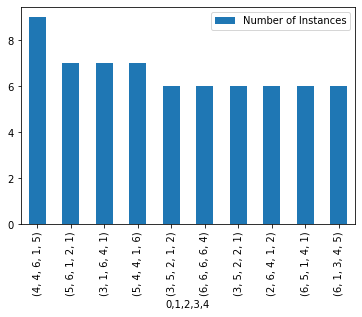

In [45]:
norwegianw.combo().nlargest(n=10,columns = ['Number of Instances']).plot.bar()

<AxesSubplot:xlabel='0,1,2,3,4'>

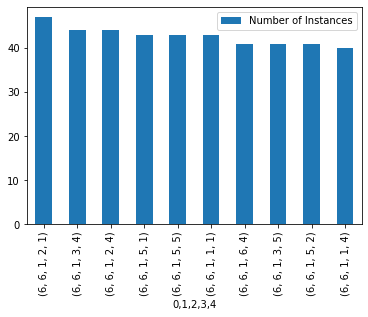

In [46]:
yesterday.combo().nlargest(n=10,columns = ['Number of Instances']).plot.bar()

## Letters of the Roman Alphabet

### Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.

In [47]:
alpha = Die(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

In [48]:
alpha.change_the_weight('A',8.4966)

In [49]:
alpha.change_the_weight('B',2.0720)

In [50]:
alpha.change_the_weight('C',4.5388)

In [51]:
alpha.change_the_weight('D',3.3844)

In [52]:
alpha.change_the_weight('E',11.1607)

In [53]:
alpha.change_the_weight('F',1.8121)

In [54]:
alpha.change_the_weight('G',2.4705)

In [55]:
alpha.change_the_weight('H',3.0034)

In [56]:
alpha.change_the_weight('I',7.5448)

In [57]:
alpha.change_the_weight('J',0.1965)

In [58]:
alpha.change_the_weight('K',1.1016)

In [59]:
alpha.change_the_weight('L',5.4893)

In [60]:
alpha.change_the_weight('M',3.0129)

In [61]:
alpha.change_the_weight('N',6.6544)

In [62]:
alpha.change_the_weight('O',7.1635)

In [63]:
alpha.change_the_weight('P',3.1671)

In [64]:
alpha.change_the_weight('Q',0.1962)

In [65]:
alpha.change_the_weight('R',7.5809)

In [66]:
alpha.change_the_weight('S',5.7351)

In [67]:
alpha.change_the_weight('T',6.9509)

In [68]:
alpha.change_the_weight('U',3.6308)

In [69]:
alpha.change_the_weight('V',1.0074)

In [70]:
alpha.change_the_weight('W',1.2899)

In [71]:
alpha.change_the_weight('X',0.2902)

In [72]:
alpha.change_the_weight('Y',1.7779)

In [73]:
alpha.change_the_weight('Z',0.2722)

In [74]:
alpha.show()

The current state faces and weights:


,faces,weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


In [75]:
game5 = DieGame([alpha,alpha,alpha,alpha,alpha])

In [76]:
game5.play2(1000)

In [77]:
game5.display()

,0,1,2,3,4
Roll_Number,,,,,
1,Y,E,E,N,M
2,S,L,S,H,D
3,I,R,E,A,E
4,B,U,B,C,D
5,N,R,T,L,T
...,...,...,...,...,...
996,E,O,I,T,R
997,P,N,A,A,Y
998,R,R,D,E,S


### How many combos can you that look like actual English words? ← NOTE: "combo" here just means resulting sequence, not literally combination as opposed to permutation.

In [78]:
hey_jude = Analyzer(game5)

In [79]:
hey_jude.combo()

Number of Instances
0 1 2 3 4                     
A A A I Y                    1
O O O F T                    1
    P G A                    1
    S N E                    1
    T E U                    1
...                        ...
H A C F I                    1
      I A                    1
    E N M                    1
G O A O C                    1
Z T E R E                    1

[1000 rows x 1 columns]

In [80]:
pd.set_option('display.max_rows', 100) #I did a 1000, looked through and it really didn't look like anything
hey_jude.combo()

Number of Instances
0 1 2 3 4                     
A A A I Y                    1
O O O F T                    1
    P G A                    1
    S N E                    1
    T E U                    1
...                        ...
H A C F I                    1
      I A                    1
    E N M                    1
G O A O C                    1
Z T E R E                    1

[1000 rows x 1 columns]

In [81]:
game6 = DieGame([alpha,alpha,alpha])

In [82]:
game6.play2(1000)

In [83]:
gently_weeps = Analyzer(game6)

In [84]:
pd.set_option('display.max_rows', 100) #More frequent with 3 letter words (and easier to see) especially if you consider government 
# agency names words
gently_weeps.combo()

Number of Instances
0 1 2                     
A A A                    1
O I T                    1
    U                    1
  K O                    1
  L E                    1
...                    ...
N N N                    3
I I N                    3
  R R                    3
E E E                    4
  I E                    4

[904 rows x 1 columns]

### Directory Listing:

In [86]:
!ls -lRF -o

total 568
drwxr-xr-x@  6 kylerhalat-shafer     192 Jul 13 13:06 Added Sort/
drwxr-xr-x@  7 kylerhalat-shafer     224 Jul 12 18:32 Archive/
-rw-r--r--   1 kylerhalat-shafer    3877 Jul 12 22:52 Clean_Test.ipynb
-rw-rw-r--@  1 kylerhalat-shafer  136021 Jul 13 13:52 Final_Project.ipynb
drwxr-xr-x@  6 kylerhalat-shafer     192 Jul 12 22:05 Full Duplicates/
drwxr-xr-x@ 11 kylerhalat-shafer     352 Jul 14 09:31 Full package/
drwxr-xr-x@  4 kylerhalat-shafer     128 Jul 12 18:34 Specs/
-rw-r--r--@  1 kylerhalat-shafer    7048 Jul 13 00:24 Test.ipynb
drwxr-xr-x@  5 kylerhalat-shafer     160 Jul 11 20:17 __pycache__/
-rw-r--r--   1 kylerhalat-shafer  136978 Jul 14 09:31 final-project-submission.ipynb

./Added Sort:
total 40
drwxr-xr-x@ 3 kylerhalat-shafer    96 Jul 13 13:06 __pycache__/
-rw-r--r--@ 1 kylerhalat-shafer  8884 Jul 13 13:03 montecarlo1.py
-rw-r--r--@ 1 kylerhalat-shafer  6217 Jul 13 13:04 montecarlo1_test.py

./Added Sort/__pycache__:
total 16
-rw-r--r--  1 kylerhalat-shafer  7376 

## Intallation Output:

In [1]:
pip install -e /Users/kylerhalat-shafer/Desktop/UVA/MSDS/Programming_for_Data_Science/Final_Project/Full_package

Obtaining file:///Users/kylerhalat-shafer/Desktop/UVA/MSDS/Programming_for_Data_Science/Final_Project/Full_package
  Preparing metadata (setup.py) ... done
  Attempting uninstall: montecarlo
    Found existing installation: montecarlo 1.0.0
    Uninstalling montecarlo-1.0.0:
      Successfully uninstalled montecarlo-1.0.0
  Running setup.py develop for montecarlo
Note: you may need to restart the kernel to use updated packages.
